In [139]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [148]:
unit = pd.read_excel('unit.xlsx').drop('Unnamed: 0',axis=1)

In [146]:
unit.sort_values('values',ascending=True).head(3) # ТРИ ХУДШИХ ВАРИАНТА

,Сессия каждые N дней,Количество уровней в сессию,Показы рекламы принудительной каждые N уровней,Просмотр рекламы за ежедневную награду каждую N игровую сессию,Просмотр рекламы для возрождения и др. за сессию,Покупка бустеров каждую N сессию,Покупка декоративных элементов каждую N сессию,values
135,3,3,8,3,1,6,10,-52015
133,3,3,8,3,1,3,10,-42425
183,3,6,8,3,1,6,10,-39263


In [147]:
unit.sort_values('values',ascending=False).head(3) # ТРИ ЛУЧШИХ ВАРИАНТА

,Сессия каждые N дней,Количество уровней в сессию,Показы рекламы принудительной каждые N уровней,Просмотр рекламы за ежедневную награду каждую N игровую сессию,Просмотр рекламы для возрождения и др. за сессию,Покупка бустеров каждую N сессию,Покупка декоративных элементов каждую N сессию,values
56,1,6,4,1,5,3,5,4205074
58,1,6,4,1,5,6,5,3944524
68,1,6,4,3,5,3,5,3414153


In [150]:
unit.columns

Index(['Сессия каждые N дней', 'Количество уровней в сессию',
       'Показы рекламы принудительной каждые N уровней',
       'Просмотр рекламы за ежедневную награду каждую N игровую сессию',
       'Просмотр рекламы для возрождения и др. за сессию',
       'Покупка бустеров каждую N сессию',
       'Покупка декоративных элементов каждую N сессию', 'values'],
      dtype='object')

### 1. По коэффициентам логистической регрессии.

In [151]:
features = ['Сессия каждые N дней', 'Количество уровней в сессию',
       'Показы рекламы принудительной каждые N уровней',
       'Просмотр рекламы за ежедневную награду каждую N игровую сессию',
       'Просмотр рекламы для возрождения и др. за сессию',
       'Покупка бустеров каждую N сессию',
       'Покупка декоративных элементов каждую N сессию']

In [152]:
X, y = unit[features], unit['values']

In [153]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [154]:
model=LogisticRegression(max_iter=1000, random_state=1)

In [155]:
model.fit(X_scaled,y)

LogisticRegression(max_iter=1000, random_state=1)

In [177]:
feature_importance = pd.DataFrame({'Признак':list(X.columns),'Важность':[i for i in model.coef_[0]]})

In [203]:
model = LogisticRegression()
model.fit(X_scaled,y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=True)

,Attribute,Importance
4,Просмотр рекламы для возрождения и др. за сессию,-0.670485
1,Количество уровней в сессию,-0.550968
3,Просмотр рекламы за ежедневную награду каждую ...,0.519192
0,Сессия каждые N дней,0.520190
5,Покупка бустеров каждую N сессию,0.521875
6,Покупка декоративных элементов каждую N сессию,0.522889
2,Показы рекламы принудительной каждые N уровней,0.546109


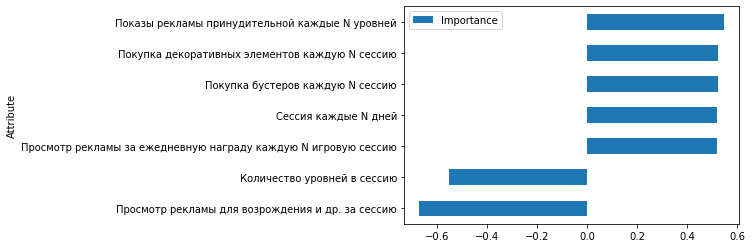

In [204]:
importances.plot(x = 'Attribute', y = 'Importance', kind = 'barh')
importances

### 2. Random Forest.

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
model=RandomForestRegressor()

In [182]:
model.fit(X,y)

RandomForestRegressor()

In [193]:
feature_importances = pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

,features,feature_importance
0,Сессия каждые N дней,0.458636
4,Просмотр рекламы для возрождения и др. за сессию,0.439420
6,Покупка декоративных элементов каждую N сессию,0.051749
3,Просмотр рекламы за ежедневную награду каждую ...,0.020481
2,Показы рекламы принудительной каждые N уровней,0.013747
1,Количество уровней в сессию,0.012276
5,Покупка бустеров каждую N сессию,0.003691


<AxesSubplot:ylabel='features'>

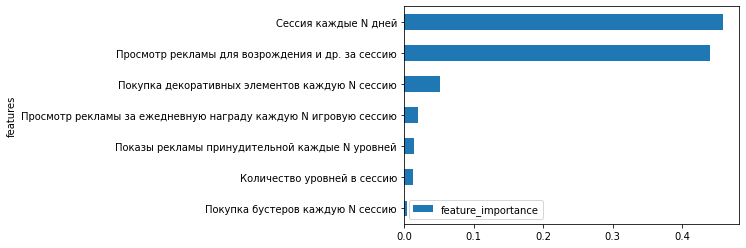

In [194]:
feature_importances.sort_values('feature_importance',ascending=True).plot(x = 'features', y = 'feature_importance', kind = 'barh')

### 3. XGBoost

In [195]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [196]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_scaled, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

<AxesSubplot:ylabel='Attribute'>

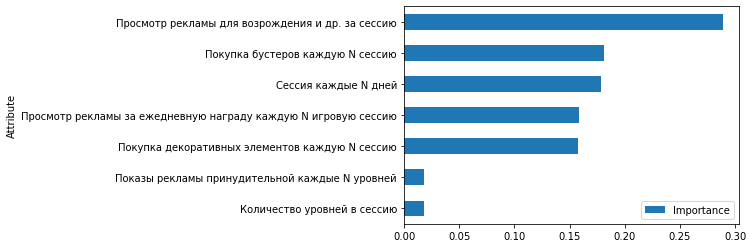

In [201]:
importances.sort_values('Importance',ascending=True).plot(x = 'Attribute', y = 'Importance', kind = 'barh')

### Коэффициенты корреляции по Пирсону и Спирману

In [213]:
unit[['Количество уровней в сессию','Просмотр рекламы для возрождения и др. за сессию', 'values']].corr().round(2)

,Количество уровней в сессию,Просмотр рекламы для возрождения и др. за сессию,values
Количество уровней в сессию,1.00,0.00,0.08
Просмотр рекламы для возрождения и др. за сессию,0.00,1.00,0.53
values,0.08,0.53,1.00


In [214]:
unit[['Количество уровней в сессию','Просмотр рекламы для возрождения и др. за сессию', 'values']].corr(method='spearman').round(2)

,Количество уровней в сессию,Просмотр рекламы для возрождения и др. за сессию,values
Количество уровней в сессию,1.00,0.0,0.08
Просмотр рекламы для возрождения и др. за сессию,0.00,1.0,0.50
values,0.08,0.5,1.00
